In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
emp_df=pd.read_csv('processed_emp_data.csv')
emp_df.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition
0,41,446,1,2,606,2,4,470,5993,8,1,6,1
1,49,961,8,1,606,3,2,673,5130,1,3,10,0
2,37,961,2,2,82,4,3,470,2090,6,3,0,1
3,33,961,3,4,606,4,3,673,2909,1,3,8,0
4,27,961,2,1,464,1,2,673,3468,9,3,2,0


In [3]:
# identifying X and y
X=emp_df.drop(['Attrition'],axis=1)
y=emp_df['Attrition']

In [4]:
# from sklearn.svm import SVC
# # define model and parameters
# model = SVC()
# kernel = ['poly', 'rbf', 'sigmoid']
# C = [50, 10, 1.0, 0.1, 0.01]
# gamma = ['scale']
# # define grid search
# grid = dict(kernel=kernel,C=C,gamma=gamma)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X, y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [5]:
# lets cross verfiy the result using train test split approach
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1176, 12)
(294, 12)
(1176,)
(294,)


In [6]:
# lets fit the model with the data
from sklearn.svm import SVC
svc_model=SVC(C=50,gamma='scale',kernel='poly',probability=True)
svc_model.fit(X_train,y_train)

SVC(C=50, kernel='poly', probability=True)

In [7]:
# prediction on y
y_train_pred=svc_model.predict(X_train)
y_test_pred=svc_model.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#accuracy check on train and test data
print('accuracy score of training data for svc model: ',accuracy_score(y_train,y_train_pred))
print('accuracy score of testing data for svc model: ',accuracy_score(y_test,y_test_pred))

accuracy score of training data for svc model:  0.8384353741496599
accuracy score of testing data for svc model:  0.8401360544217688


No Skill: ROC AUC=0.500
SVC: ROC AUC=0.479


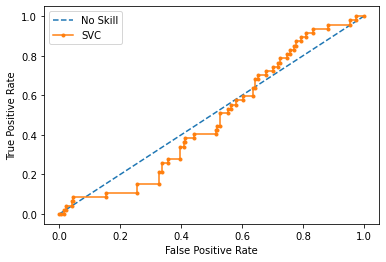

In [9]:
# lets plot roc curve and find auc score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
# predict probabilities
lr_probs = svc_model.predict_proba(X_test)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVC: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='SVC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()